<center>

# Esercizio 2

</center>

In [113]:
import numpy as np
import matplotlib.pyplot as plt

In [114]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects
from keras.optimizers import SGD

#### Genero dataset training e test

In [115]:
#Parametri per la scrittura dell'equazione di terzo grado
a = 3
b = -2
c = -3
d = 4

In [116]:
Ntrain = 2500
Ntest = 250

np.random.seed(0)   #impongo seed generatore numeri casuali

#Determino le x di allenamento e validazione
x_train = np.random.uniform(-1, 1, Ntrain) #Ascisse Train
x_valid = np.random.uniform(-1, 1, Ntest)  #Ascisse Test
x_valid.sort()  #Ordino in modo crescente ascisse test

y_target = a*pow(x_valid, 3) + b*pow(x_valid, 2) + c*x_valid + d 

sigma = 0.2 #Stddev per rumore gaussiano
y_train = np.random.normal(a*pow(x_train, 3) + b*pow(x_train, 2) + c*x_train + d, sigma)  #Valori con rumore per allenamento
y_valid = np.random.normal(a*pow(x_valid, 3) + b*pow(x_valid, 2) + c*x_valid + d, sigma)  #Valori con rumore per test

#### Genero modello

In [117]:
model = Sequential()
model.add(Dense(6, activation='tanh', input_shape=(1,)))
model.add(Dense(8, activation='tanh'))
model.add(Dense(1))

optimizer = SGD(learning_rate=0.01, momentum=0.9)

model.compile(optimizer= optimizer, loss='mse', metrics=['mse'])
model.build(input_shape=(None, 1))

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 6)                 12        
                                                                 
 dense_28 (Dense)            (None, 8)                 56        
                                                                 
 dense_29 (Dense)            (None, 1)                 9         
                                                                 
Total params: 77 (308.00 Byte)
Trainable params: 77 (308.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [118]:
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=50,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/50
79/79 [==============================] - 1s 4ms/step - loss: 1.1433 - mse: 1.1433 - val_loss: 0.2324 - val_mse: 0.2324
Epoch 2/50
79/79 [==============================] - 0s 2ms/step - loss: 0.3104 - mse: 0.3104 - val_loss: 0.2115 - val_mse: 0.2115
Epoch 3/50
79/79 [==============================] - 0s 2ms/step - loss: 0.2514 - mse: 0.2514 - val_loss: 0.1533 - val_mse: 0.1533
Epoch 4/50
79/79 [==============================] - 0s 2ms/step - loss: 0.1355 - mse: 0.1355 - val_loss: 0.0858 - val_mse: 0.0858
Epoch 5/50
79/79 [==============================] - 0s 2ms/step - loss: 0.0843 - mse: 0.0843 - val_loss: 0.0652 - val_mse: 0.0652
Epoch 6/50
79/79 [==============================] - 0s 2ms/step - loss: 0.0620 - mse: 0.0620 - val_loss: 0.0501 - val_mse: 0.0501
Epoch 7/50
79/79 [==============================] - 0s 2ms/step - loss: 0.0497 - mse: 0.0497 - val_loss: 0.0462 - val_mse: 0.0462
Epoch 8/50
79/79 [==============================] - 0s 2ms/step - loss: 0.0456 - mse: 0.04

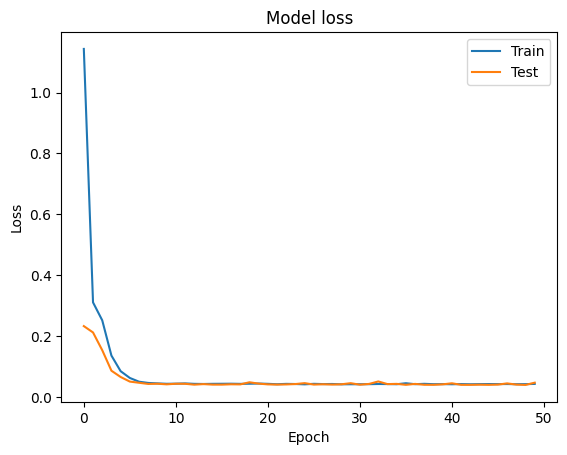

In [119]:
appo = history.history['loss']
pippo = history.history['val_loss']

plt.plot(appo)
plt.plot(pippo)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

In [120]:
#Stampo Loss-Function
file = open('loss.dat', 'w')

for i in range(0, len(appo)):
    file.write(str(appo[i]) + "  ")

file.write('\n')

for i in range(0, len(pippo)):
    file.write(str(pippo[i]) + "  ")

file.write('\n')
file.close()

4/4 [==============================] - 0s 1ms/step


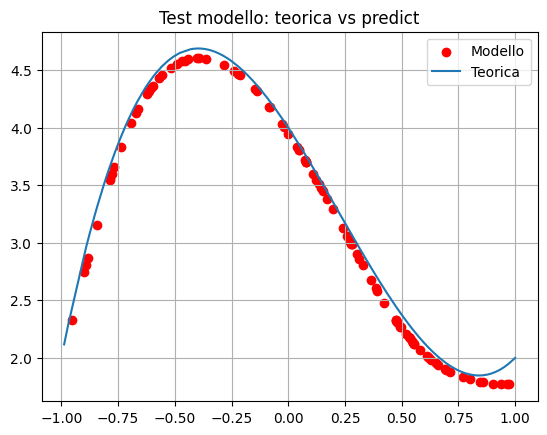

8/8 [==============================] - 0s 3ms/step - loss: 0.0084 - mse: 0.0084

Test loss: 0.008393989875912666
Test accuracy: 0.008393989875912666


In [121]:
x_predicted = np.random.uniform(-1, 1, 100)

#Il metodo predict() prende come input i dati di input x_predicted e restituisce le previsioni corrispondenti generate dal modello.
#applica il modello alle features di input per ottenere le corrispondenti previsioni di output.

y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted, color='r', label = 'Modello')
plt.plot(x_valid, y_target, label = 'Teorica')
plt.title("Test modello: teorica vs predict")
plt.legend()

plt.grid(True)
plt.show()


score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [122]:
#Stampo Fit Funzione
file = open('pred1.dat', 'w')

for i in range(0, len(x_predicted)):
    file.write(str(x_predicted[i]) + "  ")

file.write('\n')

for i in range(0, len(y_predicted)):
    appo = str(y_predicted[i])
    appo = appo.strip('[]')
    file.write(str(appo) + "    ")

file.write('\n')
file.close()

13/13 [==============================] - 0s 1ms/step


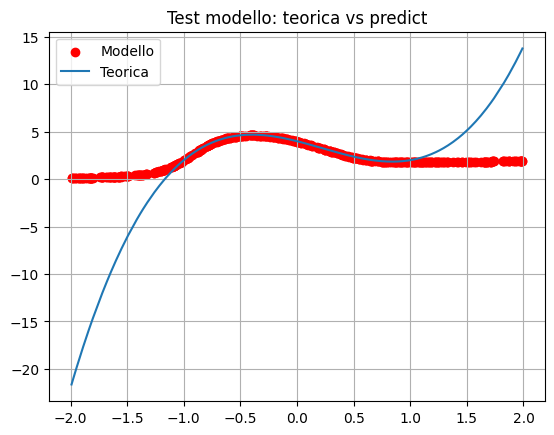

8/8 [==============================] - 0s 2ms/step - loss: 0.0084 - mse: 0.0084

Test loss: 0.008393989875912666
Test accuracy: 0.008393989875912666


In [123]:
x_predicted = np.random.uniform(-2, 2, 400)
y_predicted = model.predict(x_predicted)

x_targ = x_predicted.copy()
x_targ.sort()
y_targ = a*pow(x_targ, 3) + b*pow(x_targ, 2) + c*x_targ + d 

plt.scatter(x_predicted, y_predicted, color='r', label = 'Modello')
plt.plot(x_targ, y_targ, label = 'Teorica')
plt.title("Test modello: teorica vs predict")
plt.legend()

plt.grid(True)
plt.show()

score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])


In [124]:
file = open('pred2.dat', 'w')
for i in range(0, len(x_predicted)):
    file.write(str(x_predicted[i]) + "  ")

file.write('\n')

for i in range(0, len(y_predicted)):
    appo = str(y_predicted[i])
    appo = appo.strip('[]')
    file.write(str(appo) + "    ")

file.write('\n')

for i in range(0, len(x_targ)):
    file.write(str(x_targ[i]) + "  ")

file.write('\n')

for i in range(0, len(y_target)):
    file.write(str(y_target[i]) + "  ")

file.write('\n')
file.close()